# Programming Assignment Week3
## Dataset: Iris
### Gamze Keçibaş
---
### CONTENT
- **Step 01.** Import libraries    
- **Step 02.** Load and preprocess data      
- **Step 03.** Build the first model  
- **Step 04.** Fit the model to the training data  
- **Step 05.** Plot learning curves
- **Step 06.** Reducing overfitting in the model
- **Step 07.** Instantiate, compile and train the model
- **Step 08.** Plot the learning curves of regularized model
- **Step 09.** Implement callback objects  
- **Step 10.** Final learning curves
- **Step 11.** Model evaluation

* **Step 01.** Import libraries

In [1]:
from numpy.random import seed
seed(8)
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection
%matplotlib inline

#### The Iris dataset

In this assignment, you will use the [Iris dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html). It consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. For a reference, see the following papers:

- R. A. Fisher. "The use of multiple measurements in taxonomic problems". Annals of Eugenics. 7 (2): 179–188, 1936.

Your goal is to construct a neural network that classifies each sample into the correct class, as well as applying validation and regularisation techniques.

**Step 02.** Load and preprocess the data

First read in the Iris dataset using `datasets.load_iris()`, and split the dataset into training and test sets.

In [8]:
def read_in_and_split_data(iris_data):
    """
    This function takes the Iris dataset as loaded by sklearn.datasets.load_iris(), and then 
    splits so that the training set includes 90% of the full dataset, with the test set 
    making up the remaining 10%.
    Your function should return a tuple (train_data, test_data, train_targets, test_targets) 
    of appropriately split training and test data and targets.
    
    If you would like to import any further packages to aid you in this task, please do so in the 
    Package Imports cell above.
    """
    x, y = iris_data.data, iris_data.target
    (train_data, test_data, train_targets, test_targets)= model_selection.train_test_split(x,y,test_size=0.1, random_state=123)
    return (train_data, test_data, train_targets, test_targets)

In [9]:
# Run your function to generate the test and training data.

iris_data = datasets.load_iris()
train_data, test_data, train_targets, test_targets = read_in_and_split_data(iris_data)

We will now convert the training and test targets using a one hot encoder.

In [10]:
# Convert targets to a one-hot encoding

train_targets = tf.keras.utils.to_categorical(np.array(train_targets))
test_targets = tf.keras.utils.to_categorical(np.array(test_targets))

* **Step 03.** Build the first model


You can now construct a model to fit to the data. Using the Sequential API, build your model according to the following specifications:

* The model should use the `input_shape` in the function argument to set the input size in the first layer.
* The first layer should be a dense layer with 64 units.
* The weights of the first layer should be initialised with the He uniform initializer.
* The biases of the first layer should be all initially equal to one.
* There should then be a further four dense layers, each with 128 units.
* This should be followed with four dense layers, each with 64 units.
* All of these Dense layers should use the ReLU activation function.
* The output Dense layer should have 3 units and the softmax activation function.

In total, the network should have 10 layers.

In [11]:
def get_model(input_shape):
    """
    This function should build a Sequential model according to the above specification. Ensure the 
    weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument.
    Your function should return the model.
    """
    model= tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(64, kernel_initializer= tf.keras.initializers.he_uniform(), bias_initializer= 'ones', activation= 'relu', input_shape= input_shape))
    model.add(tf.keras.layers.Dense(128, activation= 'relu'))
    model.add(tf.keras.layers.Dense(128, activation= 'relu'))
    model.add(tf.keras.layers.Dense(128, activation= 'relu'))
    model.add(tf.keras.layers.Dense(128, activation= 'relu'))
    model.add(tf.keras.layers.Dense(64, activation= 'relu'))
    model.add(tf.keras.layers.Dense(64, activation= 'relu'))
    model.add(tf.keras.layers.Dense(64, activation= 'relu'))
    model.add(tf.keras.layers.Dense(64, activation= 'relu'))
    model.add(tf.keras.layers.Dense(3, activation= 'softmax'))
    return model

In [12]:
# Run your function to get the model

model = get_model(train_data[0].shape)

#### Compile the model

In [13]:
def compile_model(model):
    """
    This function takes in the model returned from your get_model function, and compiles it with an optimiser,
    loss function and metric.
    Compile the model using the Adam optimiser (with learning rate set to 0.0001), 
    the categorical crossentropy loss function and accuracy as the only metric. 
    Your function doesn't need to return anything; the model will be compiled in-place.
    """
    model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= 0.0001) ,
                  loss=tf.keras.losses.categorical_crossentropy,
                 metrics= ['accuracy'])
    

In [14]:
# Run your function to compile the model
compile_model(model)

* **Step 04.** Fit the model to the training data

In [15]:
def train_model(model, train_data, train_targets, epochs= 5):
    """
    This function should train the model for the given number of epochs on the 
    train_data and train_targets. 
    Your function should return the training history, as returned by model.fit.
    """
    history= model.fit(train_data, train_targets, epochs= epochs, batch_size=40, validation_split= 0.15 )
    return history
    

In [16]:
# Run your function to train the model

history = train_model(model, train_data, train_targets, epochs=800)

Train on 114 samples, validate on 21 samples
Epoch 1/800
114/114 [==============================] - 2s 16ms/sample - loss: 1.2652 - accuracy: 0.3684 - val_loss: 1.2664 - val_accuracy: 0.1905
Epoch 2/800
114/114 [==============================] - 0s 963us/sample - loss: 1.1509 - accuracy: 0.3684 - val_loss: 1.1744 - val_accuracy: 0.1905
Epoch 3/800
114/114 [==============================] - 0s 873us/sample - loss: 1.0732 - accuracy: 0.4912 - val_loss: 1.0989 - val_accuracy: 0.6190
Epoch 4/800
114/114 [==============================] - 0s 910us/sample - loss: 1.0136 - accuracy: 0.6754 - val_loss: 1.0467 - val_accuracy: 0.6190
Epoch 5/800
114/114 [==============================] - 0s 945us/sample - loss: 0.9640 - accuracy: 0.6754 - val_loss: 1.0179 - val_accuracy: 0.6190
Epoch 6/800
114/114 [==============================] - 0s 917us/sample - loss: 0.9284 - accuracy: 0.6754 - val_loss: 0.9934 - val_accuracy: 0.6190
Epoch 7/800
114/114 [==============================] - 0s 892us/sample - l

* **Step 05.** Plot the learning curves

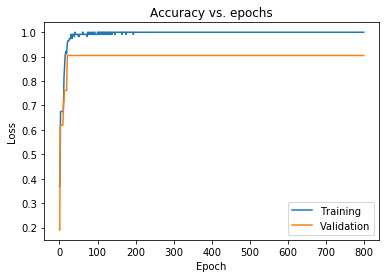

In [17]:
# Run this cell to plot the epoch vs accuracy graph

try:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
except KeyError:
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

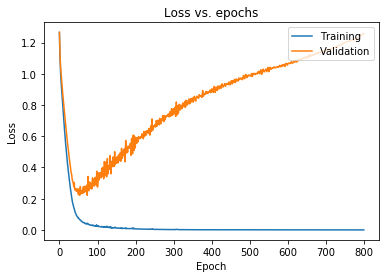

In [18]:
#Run this cell to plot the epoch vs loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

Oh no! We have overfit our dataset. You should now try to now try to mitigate this overfitting.

* **Step 06.** Reducing overfitting in the model

You should now define a new regularised model.
The specs for the regularised model are the same as our original model, with the addition of two dropout layers, weight decay, and a batch normalisation layer. 

In [2]:
def get_regularised_model(input_shape, dropout_rate, weight_decay):
    """
    This function should build a regularised Sequential model according to the above specification. 
    The dropout_rate argument in the function should be used to set the Dropout rate for all Dropout layers.
    L2 kernel regularisation (weight decay) should be added using the weight_decay argument to 
    set the weight decay coefficient in all Dense layers that use L2 regularisation.
    Ensure the weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument input_shape.
    Your function should return the model.
    """
    model= tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(64, kernel_initializer= tf.keras.initializers.he_uniform(), bias_initializer= 'ones', 
                                    activation= 'relu',kernel_regularizer= tf.keras.regularizers.l2(weight_decay),
                                    input_shape= input_shape))
    model.add(tf.keras.layers.Dense(128, activation= 'relu',kernel_regularizer= tf.keras.regularizers.l2(weight_decay)))
    model.add(tf.keras.layers.Dense(128, activation= 'relu',kernel_regularizer= tf.keras.regularizers.l2(weight_decay)))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.Dense(128, activation= 'relu',kernel_regularizer= tf.keras.regularizers.l2(weight_decay)))
    model.add(tf.keras.layers.Dense(128, activation= 'relu',kernel_regularizer= tf.keras.regularizers.l2(weight_decay)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dense(64, activation= 'relu',kernel_regularizer= tf.keras.regularizers.l2(weight_decay)))
    model.add(tf.keras.layers.Dense(64, activation= 'relu',kernel_regularizer= tf.keras.regularizers.l2(weight_decay)))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.Dense(64, activation= 'relu',kernel_regularizer= tf.keras.regularizers.l2(weight_decay)))
    model.add(tf.keras.layers.Dense(64, activation= 'relu',kernel_regularizer= tf.keras.regularizers.l2(weight_decay)))
    model.add(tf.keras.layers.Dense(3, activation= 'softmax'))
    return model

* **Step 07.** Instantiate, compile and train the model

In [20]:
# Instantiate the model, using a dropout rate of 0.3 and weight decay coefficient of 0.001
reg_model = get_regularised_model(train_data[0].shape, 0.3, 0.001)

In [21]:
# Compile the model
compile_model(reg_model)

In [22]:
# Train the model
reg_history = train_model(reg_model, train_data, train_targets, epochs=800)

Train on 114 samples, validate on 21 samples
Epoch 1/800
114/114 [==============================] - 3s 26ms/sample - loss: 2.0085 - accuracy: 0.2632 - val_loss: 2.0515 - val_accuracy: 0.4286
Epoch 2/800
114/114 [==============================] - 0s 1ms/sample - loss: 2.0013 - accuracy: 0.3070 - val_loss: 2.0342 - val_accuracy: 0.4286
Epoch 3/800
114/114 [==============================] - 0s 929us/sample - loss: 2.0346 - accuracy: 0.2281 - val_loss: 2.0182 - val_accuracy: 0.4286
Epoch 4/800
114/114 [==============================] - 0s 2ms/sample - loss: 1.9991 - accuracy: 0.3070 - val_loss: 2.0047 - val_accuracy: 0.4286
Epoch 5/800
114/114 [==============================] - 0s 903us/sample - loss: 1.9879 - accuracy: 0.3158 - val_loss: 1.9937 - val_accuracy: 0.4286
Epoch 6/800
114/114 [==============================] - 0s 2ms/sample - loss: 1.9838 - accuracy: 0.3246 - val_loss: 1.9837 - val_accuracy: 0.4286
Epoch 7/800
114/114 [==============================] - 0s 942us/sample - loss: 1

* **Step 08.** Plot the learning curves of regularized model

Let's now plot the loss and accuracy for the training and validation sets.

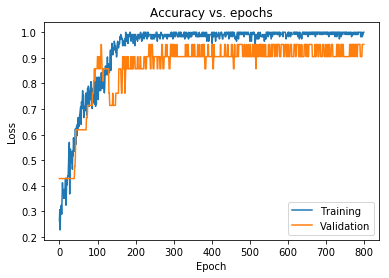

In [23]:
#Run this cell to plot the new accuracy vs epoch graph

try:
    plt.plot(reg_history.history['accuracy'])
    plt.plot(reg_history.history['val_accuracy'])
except KeyError:
    plt.plot(reg_history.history['acc'])
    plt.plot(reg_history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

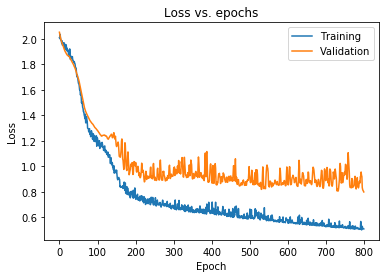

In [24]:
#Run this cell to plot the new loss vs epoch graph

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

We can see that the regularisation has helped to reduce the overfitting of the network.
You will now incorporate callbacks into a new training run that implements early stopping and learning rate reduction on plateaux.

* **Step 09.** Implement callback objects  
Fill in the function below so that:

* It creates an `EarlyStopping` callback object and a `ReduceLROnPlateau` callback object
* The early stopping callback is used and monitors validation loss with the mode set to `"min"` and patience of 30.
* The learning rate reduction on plateaux is used with a learning rate factor of 0.2 and a patience of 20.

In [25]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def get_callbacks():
    """
    This function should create and return a tuple (early_stopping, learning_rate_reduction) callbacks.
    The callbacks should be instantiated according to the above requirements.
    """
    early_stopping= tf.keras.callbacks.EarlyStopping(monitor= 'val_loss', mode= 'min',patience= 30)
    learning_rate_reduction= tf.keras.callbacks.ReduceLROnPlateau(factor= 0.2, patience=20)
    return (early_stopping, learning_rate_reduction)
    

Run the cell below to instantiate and train the regularised model with the callbacks.

In [26]:
call_model = get_regularised_model(train_data[0].shape, 0.3, 0.0001)
compile_model(call_model)
early_stopping, learning_rate_reduction = get_callbacks()
call_history = call_model.fit(train_data, train_targets, epochs=800, validation_split=0.15,
                         callbacks=[early_stopping, learning_rate_reduction], verbose=0)

In [27]:
learning_rate_reduction.patience

20

Finally, let's replot the accuracy and loss graphs for our new model.  
* **Step 10.** Final learning curves

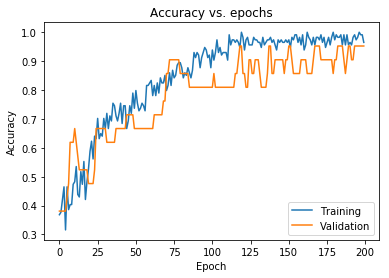

In [28]:
try:
    plt.plot(call_history.history['accuracy'])
    plt.plot(call_history.history['val_accuracy'])
except KeyError:
    plt.plot(call_history.history['acc'])
    plt.plot(call_history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

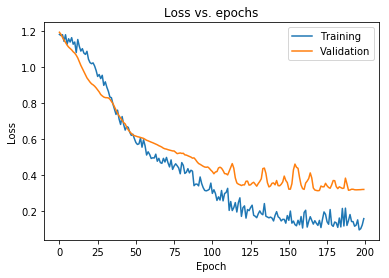

In [29]:
plt.plot(call_history.history['loss'])
plt.plot(call_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

* **Step 11.** Model evaluation

In [30]:
# Evaluate the model on the test set

test_loss, test_acc = call_model.evaluate(test_data, test_targets, verbose=0)
print("Test loss: {:.3f}\nTest accuracy: {:.2f}%".format(test_loss, 100 * test_acc))

Test loss: 0.266
Test accuracy: 93.33%
